Date: 08/05/2024

Today is Day 12 of my 30 Days of ML challenge/project. 

Upon finishing the Kaggle Learn Data Visualization course, I wanted to apply what I've learned in my first Data Visualization project.

The dataset that I wanted to explore and visualize through my own Seaborn charts is the Sustainable Lifestyle Rating Dataset made and posted to Kaggle by Naveen Sharma.

So, without further ado, let's get started by first importing the necessary libraries and whatnot.

In [1]:
# import base libraries and specific functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We now can read in our dataset as a set variable using pd.read_csv. I will also be setting the index column as age.

In [2]:
my_data = pd.read_csv(r"/kaggle/input/sustainable-lifestyle-rating-dataset/lifestyle_sustainability_data.csv",
                     index_col = "Age")

Now that I have loaded in the dataset, I want to take a second to simply explore it and get a feel what I'm working with in terms of the types of data and what information the dataset holds.

In [3]:
my_data.head()

,ParticipantID,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
Age,,,,,,,,,,,,,,,,,,,
35,1,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
28,2,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
65,3,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
42,4,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
31,5,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3


In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 35 to 55
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ParticipantID                  499 non-null    int64 
 1   Location                       499 non-null    object
 2   DietType                       499 non-null    object
 3   LocalFoodFrequency             499 non-null    object
 4   TransportationMode             499 non-null    object
 5   EnergySource                   499 non-null    object
 6   HomeType                       499 non-null    object
 7   HomeSize                       499 non-null    int64 
 8   ClothingFrequency              499 non-null    object
 9   SustainableBrands              499 non-null    bool  
 10  EnvironmentalAwareness         499 non-null    int64 
 11  CommunityInvolvement           381 non-null    object
 12  MonthlyElectricityConsumption  499 non-null    int64 
 13  MonthlyWat

Some columns that stand out to me and thus make me want to take a further look at specifically are:

* **Age** - Which age groups have a better sustainability rating than the other groups?
* **Location** - How much of a difference is there between the average sustainability rating for urban environments and that of suburban or rural environments?
* **DietType** - Which diets have a better correlation with good health?
* **HomeType** - How much of a difference is there in the sustainability between living in a house vs an apartment?
* **SustainableBrands** - Does specifically shopping at brands that market themselves as 'sustainable' truly mean sustainable shopping?
* **CommunityInvolvement** - Should we be making more of an effort to involve ourselves with our community?
* **MonthlyWaterConsumption** - Drink your water folks!!
* **Gender** - Is there even any noticeable relation between your gender and your sustainability?
* **UsingPlasticProducts** - We already know how bad plastic is for the environment. How bad is it for your lifestyle?
* **DisposalMethods** - We often neglect the importance of recycling. Let's see once and for all just how important it really is.
* **PhysicalActivities** - Is physical health really as important as much as it is stressed by modern society?

I am going to start with the 'age' column. For this column, I will be using a scatterplot with the main intent of seeing if there is a correlation between one's age and their sustainability rating. In which case, I will then make a regplot to draw the regression line.

<Axes: title={'center': 'Comparing Age and Sustainability Rating'}, xlabel='Age', ylabel='Rating'>

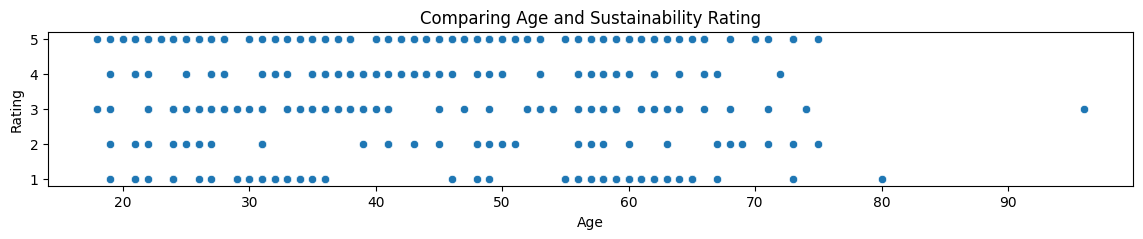

In [5]:
# adjust figure size 
plt.figure(figsize =(14,2))

# change title
plt.title("Comparing Age and Sustainability Rating")

# make scatterplot using Age as x and Rating as y
sns.scatterplot(data = my_data, x = 'Age', y = 'Rating')

Let's do another scatterplot but this time, switch the axes.

<Axes: title={'center': 'Comparing Sustainability Rating and Age'}, xlabel='Rating', ylabel='Age'>

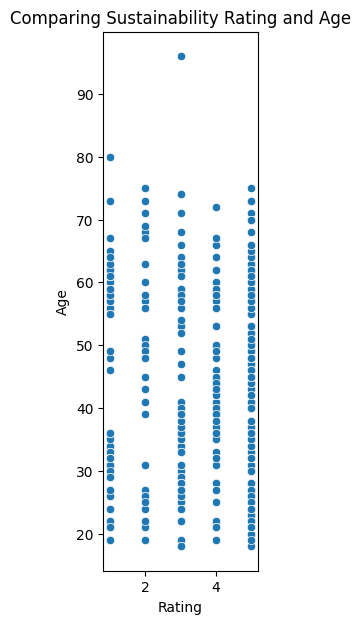

In [6]:
# change the figsize to accompany the switch of the axes
plt.figure(figsize = (2,7))

# change title of scatterplot
plt.title("Comparing Sustainability Rating and Age")

sns.scatterplot(data = my_data, x = "Rating", y = "Age")

There doesn't seem to be any clear correlation between age and rating. 

However something I noticed is that there is barely anyone in the age group of between 35 and 55 that has an overly poor lifestyle sustainability rating (1), while there are many between 20 and 35 and between 55 and 70 that have a rating of 1.

Next, I will move on to the 'location' column.

For the location column, as it is a categorical column with basically only 3 unique possible values ('urban', 'suburban', and 'rural'), I wanted to first make a bar chart.

Text(0, 0.5, 'Avg. Sustainability Rating')

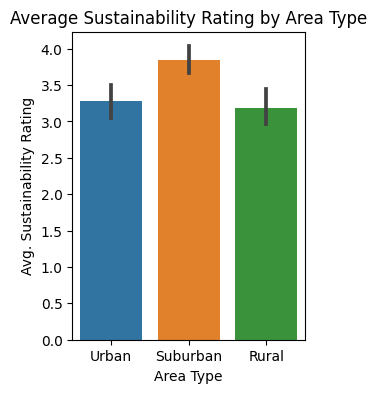

In [7]:
# changing the figure size
plt.figure(figsize = (3, 4))

# making barplot
sns.barplot(x = my_data['Location'], y = my_data['Rating'])

# changing the title / labels of the barplot
plt.title("Average Sustainability Rating by Area Type")
plt.xlabel("Area Type", )
plt.ylabel('Avg. Sustainability Rating')

The displyed bar chart shows that people living in suburban areas have the highest average sustainability rating, with people in urban areas coming in second with a slightly higher average rating than rural.

Similar to the 'location' column, the 'DietType' column also has three unique categorical values. 

As such, I will be making another bar chart. To spice it up a bit, I wanted to mess around with a different style for the chart background.

Text(0, 0.5, 'Avg. Sustainability Rating')

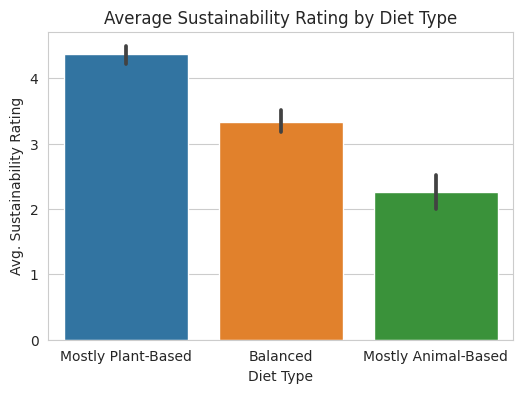

In [8]:
# adjust the figure size
plt.figure(figsize = (6,4))

# change background style to whitegrid
sns.set_style('whitegrid')

# make and display bar plot
sns.barplot(data = my_data, x = "DietType", y = "Rating")

# change the title / labels of the barplot
plt.title("Average Sustainability Rating by Diet Type")
plt.xlabel('Diet Type')
plt.ylabel("Avg. Sustainability Rating")

There is definitely a much clearer correlation between 'diet type' and 'rating' than there was between 'location' and 'rating'. 

It is evident that one's diet type has a significat effect on their lifestyle sustainability.

The next column, 'HomeType', is the same as the past two, being a categorical column with 3 unique values (one being 'Other').

As such, I will again be using a bar plot with again, a different style.

Text(0, 0.5, 'Avg. Sustainability Rating')

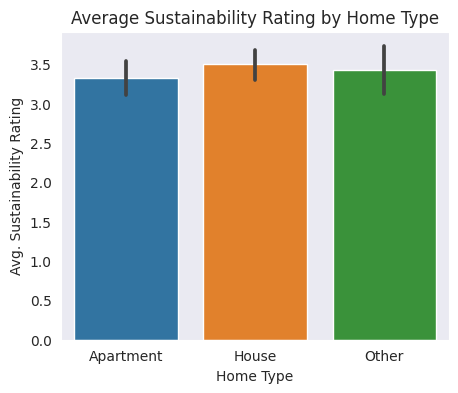

In [9]:
# adjust the figure size
plt.figure(figsize = (5,4))

# change background style to dark
sns.set_style('dark')

# make and display bar plot
sns.barplot(data = my_data, x = "HomeType", y = "Rating")

# change the title / labels of the barplot
plt.title("Average Sustainability Rating by Home Type")
plt.xlabel('Home Type')
plt.ylabel("Avg. Sustainability Rating")

Not much to be noted here as there isn't really a definite correlation besides people living in houses having a slightly higher average sustainability rating than the other two options.

I will now be looking at 'SustainableBrands', which is the one column I've been interested in since the start. Will the clothing brands live up to their marketing promotion of offering 'sustainable' clothing? Let's find out!!

This column is a boolean, with the two unique values simply being 'True' or 'False' as to whether or not the person has bought clothing from sustainable clothing brands. As such, we will again use a bar plot (bar plot is definitely our best friend when it comes to comparing categorical values on the x axis to numerical values on the y).

Text(0, 0.5, 'Avg. Sustainability Rating')

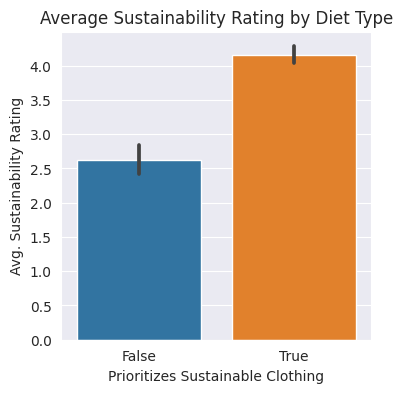

In [10]:
# adjust the figure size
plt.figure(figsize = (4,4))

# change background style to darkgrid
sns.set_style('darkgrid')

# make and display bar plot
sns.barplot(data = my_data, x = "SustainableBrands", y = "Rating")

# change the title / labels of the barplot
plt.title("Average Sustainability Rating by Diet Type")
plt.xlabel('Prioritizes Sustainable Clothing')
plt.ylabel("Avg. Sustainability Rating")

Well, who could have guessed... prioritizing the wear of sustainable clothing really does have a significantly positive impact on one's sustainability rating. There is a difference of over 1.5 rating points.

Next, I will be taking a look to see how much the level of involvement one has with their community affects their sustainability rating. Are introverts doomed to lead a poor lifestyle?

The 'CommunityInvolvement' column is again a categorical column with 3 unique values, which means: bar plot!!!

Text(0, 0.5, 'Avg. Sustainability Rating')

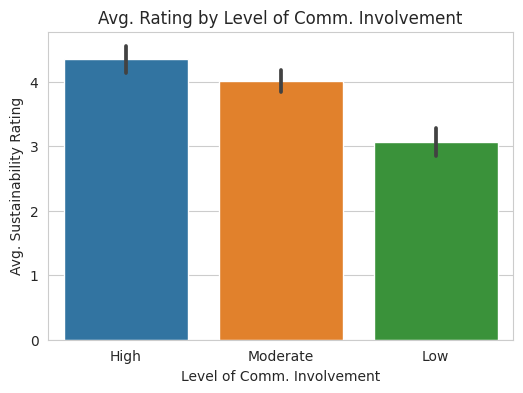

In [11]:
# adjust the figure size
plt.figure(figsize = (6,4))

# change background style to whitegrid to get better assessment of the average values
sns.set_style('whitegrid')

# make and display bar plot
sns.barplot(data = my_data, x = "CommunityInvolvement", y = "Rating")

# change the title / labels of the barplot
plt.title("Avg. Rating by Level of Comm. Involvement")
plt.xlabel('Level of Comm. Involvement')
plt.ylabel("Avg. Sustainability Rating")

Well, there is 100% a clear correlation between one's level of involvement in their community and their sustainability rating.

What's to note is that there is a very slight difference between High and Moderate, but a significant difference of almost 1 whole rating point between Moderate and Low.

Next column is 'MonthlyWaterConsumption'. This one is a numerical column with a wide range of numerical values. 

I will be doing a scatterplot for this one and seeing if I can try a regression line plot.

Text(0, 0.5, 'Sustainability Rating')

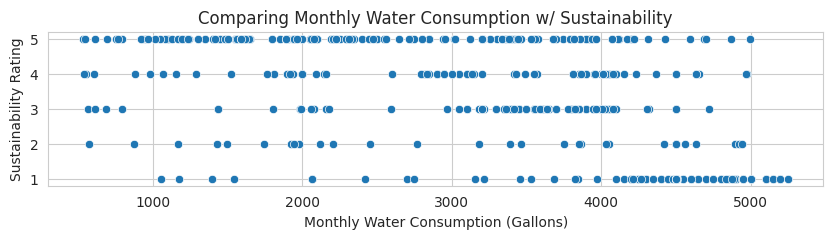

In [12]:
# adjust the figure size
plt.figure(figsize = (10,2))

# make and display bar plot
sns.scatterplot(data = my_data, x = "MonthlyWaterConsumption", y = "Rating")

# change the title / labels of the barplot
plt.title("Comparing Monthly Water Consumption w/ Sustainability")
plt.xlabel('Monthly Water Consumption (Gallons)')
plt.ylabel("Sustainability Rating")

It does seem like there may be a downwards correlation line, indicating a decrease of sustainability rating associated with too much water consumption.

Let's try to make a regplot to actually visualize the regression line.

Text(0, 0.5, 'Sustainability Rating')

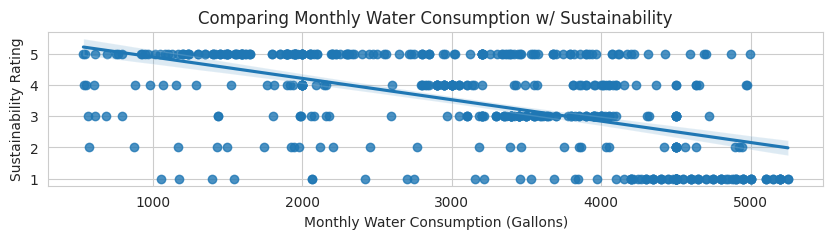

In [13]:
# adjust the figure size
plt.figure(figsize = (10,2))

# make and display bar plot
sns.regplot(data = my_data, x = "MonthlyWaterConsumption", y = "Rating")

# change the title / labels of the barplot
plt.title("Comparing Monthly Water Consumption w/ Sustainability")
plt.xlabel('Monthly Water Consumption (Gallons)')
plt.ylabel("Sustainability Rating")

It seems that I was right: there is a downwards regression line, showing a negative correlation between monthly water consumption and sustainability rating.

This is quite surprising as I first thought there would be a significantly positive correlation. The line indicates that a higher rating is very likely at a very low amount of water consumption where a lower rating is likely at a high amount of water consumption.

For the next column, 'Gender', we will be going back to using the good old trusty and reliable barplot, as the column is categorical with three unique values: 'Male', 'Female', 'Non-Binary', and 'Prefer not to say'.

Text(0, 0.5, 'Avg. Sustainability Rating')

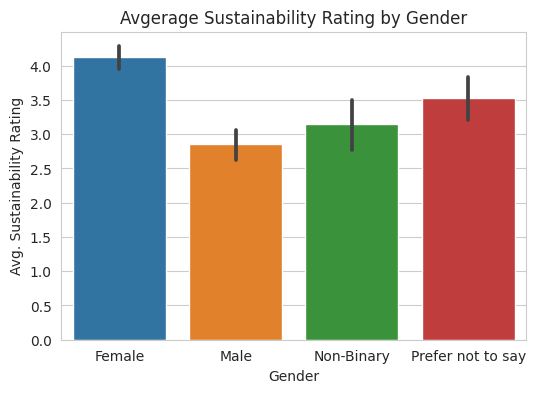

In [14]:
# adjust the figure size
plt.figure(figsize = (6,4))

# change background style to whitegrid to get better assessment of the average values
sns.set_style('whitegrid')

# make and display bar plot
sns.barplot(data = my_data, x = "Gender", y = "Rating")

# change the title / labels of the barplot
plt.title("Avgerage Sustainability Rating by Gender")
plt.xlabel('Gender')
plt.ylabel("Avg. Sustainability Rating")

Well, as a man myself, the chart is definitely a bit concerning. There is a very significant difference between the avg. sustainability ratings between the female gender and the male gender; the difference is what seems to be around 1.5 rating points!

Let's now look at the 'UsingPlasticProducts' column. There are 4 unique values for this one: 'Often', 'Sometimes', 'Rarely', and 'Never'.

Text(0, 0.5, 'Avg. Sustainability Rating')

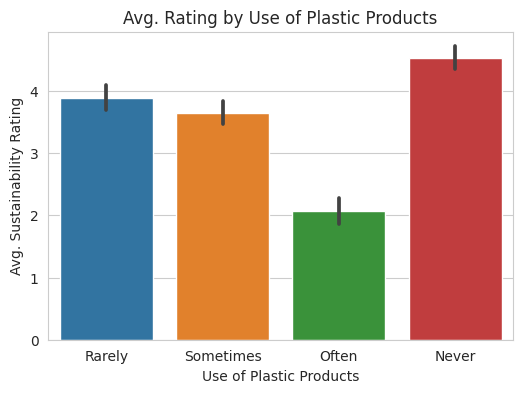

In [15]:
# adjust the figure size
plt.figure(figsize = (6,4))

# change background style to whitegrid to get better assessment of the average values
sns.set_style('whitegrid')

# make and display bar plot
sns.barplot(data = my_data, x = "UsingPlasticProducts", y = "Rating")

# change the title / labels of the barplot
plt.title("Avg. Rating by Use of Plastic Products")
plt.xlabel('Use of Plastic Products')
plt.ylabel("Avg. Sustainability Rating")

There definitely is a significant correlation here. However, it is hard to see that correlation since the bars aren't ordered how I would like them to be. I'm going to rerun the code but this time, assigning the order parameter in sns.barplot() to a preset list.

Text(0, 0.5, 'Avg. Sustainability Rating')

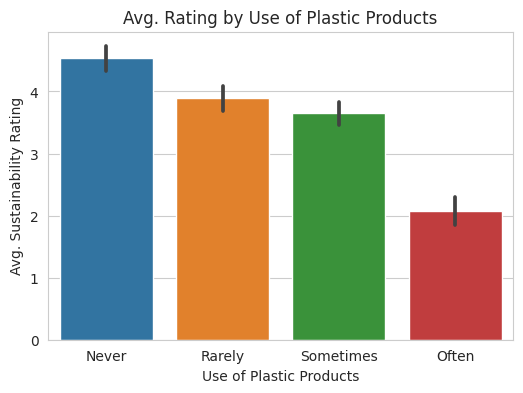

In [16]:
# adjust the figure size
plt.figure(figsize = (6,4))

# change background style to whitegrid to get better assessment of the average values
sns.set_style('whitegrid')

# set order of bars
orderL = ['Never', 'Rarely', 'Sometimes', 'Often']

# make and display bar plot
sns.barplot(data = my_data, x = "UsingPlasticProducts", y = "Rating", order = orderL)

# change the title / labels of the barplot
plt.title("Avg. Rating by Use of Plastic Products")
plt.xlabel('Use of Plastic Products')
plt.ylabel("Avg. Sustainability Rating")

There we go! Now we can much more clearly see the downward correlation as we go from 'never' to 'often'. As one's use of plastic products increases, their sustainability rating definitely takes a hit, especially with the transition from 'Sometimes' to 'Often'.

We are down to our last two columns. The first of those two is 'DisposalMethods', which is again a categorical column with 4 unique values: 'Composting', 'Recycling, 'Landfill', and 'Combination'.

Text(0, 0.5, 'Avg. Sustainability Rating')

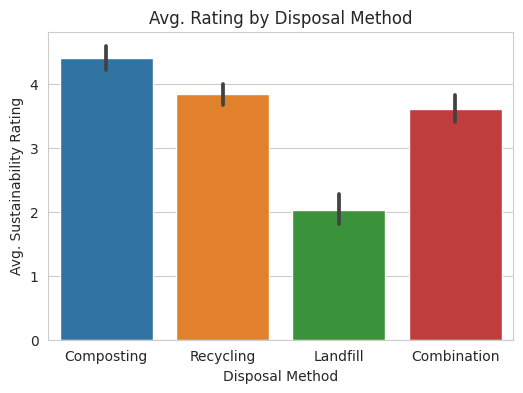

In [17]:
# adjust the figure size
plt.figure(figsize = (6,4))

# change background style to whitegrid to get better assessment of the average values
sns.set_style('whitegrid')

# set order of bars
orderL = ['Composting', 'Recycling', 'Landfill', 'Combination']

# make and display bar plot
sns.barplot(data = my_data, x = "DisposalMethods", y = "Rating", order = orderL)

# change the title / labels of the barplot
plt.title("Avg. Rating by Disposal Method")
plt.xlabel('Disposal Method')
plt.ylabel("Avg. Sustainability Rating")

Composting, Recycling, and Combination are all similar in the average ratings. Landfill, however, is at an abysmally low average rating in comparison: it is more than 1.5 less points than that of Combination, the method with the next lowest rating.

Finally, we are down to our last column that we will be visualization from this dataset: 'PhysicalActivities'. I am very curious as to the extent of the effect one's rate of exercise will have on their lifestyle sustainability. It obviously is very important for one's overall physical health, but lifestyle sustainability is of course entirely different.

This column has 3 unique categorical values: 'High', 'Moderate', and 'Low'. I am going to visualize the bar plot with the bars being ordered from 'Low' to 'High' to see if there's a significant upward correlation like we expect there to be.

Text(0, 0.5, 'Avg. Sustainability Rating')

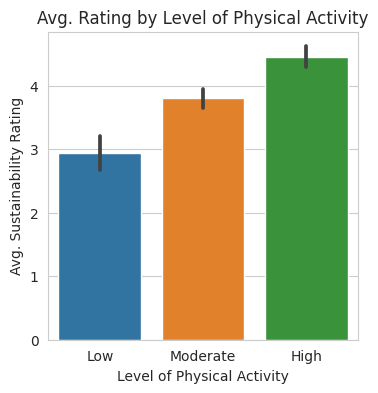

In [18]:
# adjust the figure size
plt.figure(figsize = (4,4))

# change background style to whitegrid to get better assessment of the average values
sns.set_style('whitegrid')

# set order of bars
orderL = ['Low', 'Moderate', 'High']

# make and display bar plot
sns.barplot(data = my_data, x = "PhysicalActivities", y = "Rating", order = orderL)

# change the title / labels of the barplot
plt.title("Avg. Rating by Level of Physical Activity")
plt.xlabel('Level of Physical Activity')
plt.ylabel("Avg. Sustainability Rating")

And just like we expected, there is a strong correlation between one's level of physical activity and their lifestyle sustainability rating. It likely isn't as strong of a correlation as the one between level of physical activity and one's actual physical health/wellbeing, but there definitely is a significant correlation.

Okay! We have finally gotten through all of the 11 columns in the dataset that had initially stuck out to us ones that were worth visualizing and looking into.

Throughout this project, I have gotten a lot more comfortable with data visualization, especially in regards to comparison between categorical values (x-axis) and numerical (y-axis). In my next project, I will definitely look for a dataset with more numerical v numerical comparsions and categorical columns that I must get the count of (as well as a date column) so that I can practice the other types of charts.